Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.36      0.39       650
           1       0.92      0.94      0.93      5415

    accuracy                           0.88      6065
   macro avg       0.68      0.65      0.66      6065
weighted avg       0.87      0.88      0.88      6065



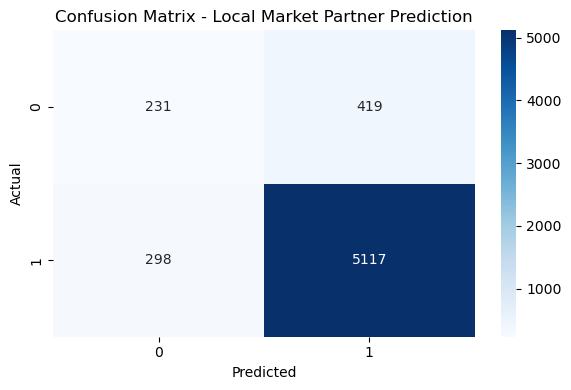

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("customer_merged_with_FINAL_1.csv")

# Drop rows with missing data in important columns (if needed)
df = df.dropna(subset=['FREQUENT_ORDER_TYPE', 'COLD_DRINK_CHANNEL', 'TRADE_CHANNEL', 'SUB_TRADE_CHANNEL'])

# Encode categorical columns
label_encoders = {}
categorical_cols = ['FREQUENT_ORDER_TYPE', 'COLD_DRINK_CHANNEL', 'TRADE_CHANNEL', 'SUB_TRADE_CHANNEL']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Set target and features
y = df['LOCAL_MARKET_PARTNER'].astype(int)  # Target
features = ['TOTAL_ORDERED', 'FREQUENT_ORDER_TYPE', 'COLD_DRINK_CHANNEL', 'TRADE_CHANNEL',
            'SUB_TRADE_CHANNEL', 'CO2_CUSTOMER']

df['CO2_CUSTOMER'] = df['CO2_CUSTOMER'].astype(int)

X = df[features]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict & evaluate
y_pred = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Local Market Partner Prediction")
plt.tight_layout()
plt.show()

In [ ]:
y = df['LOCAL_MARKET_PARTNER'].astype(int)  # Target
features = ['ORDERED_GALLONS', 'ORDERED_CASES',
            'FREQUENT_ORDER_TYPE', 'COLD_DRINK_CHANNEL', 'TRADE_CHANNEL',
            'SUB_TRADE_CHANNEL', 'CO2_CUSTOMER']